## unit 7 - פיווטיבל,פאי,עצי החלטה,חיזוי
## unit 8 - המשך מודלים דיוקים וכו'
## unit 9 - הצגות גרפיות לוג וכו'
#  :) מה ישלך הכל טוב תעשה קונטרול אף 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib as mpl

# Decision trees 
# unit 7
1. [EDA - exploratory data analysis](#section1)
2. [Build a model](#section2)

    2.1 [Define](#section2.1)    
    2.2 [Fit](#section2.2)    
    2.3 [Predict](#section2.3)    
    2.4 [Evalaute](#section2.4)

3. [Select informative attributes](#section3)

    3.1 [Petal vs. Sepal](#section3.1) 

4. [Overfitting and Underfitting](#section4)


In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a id='section1'></a>

## 1. EDA

In [3]:
pd.pivot_table(iris_df,index=['class'],values=['sepal_length','sepal_width','petal_length','petal_width'])

,petal_length,petal_width,sepal_length,sepal_width
class,,,,
Iris-setosa,1.464,0.244,5.006,3.418
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


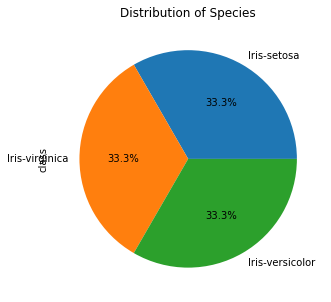

In [4]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of Species")
iris_df['class'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

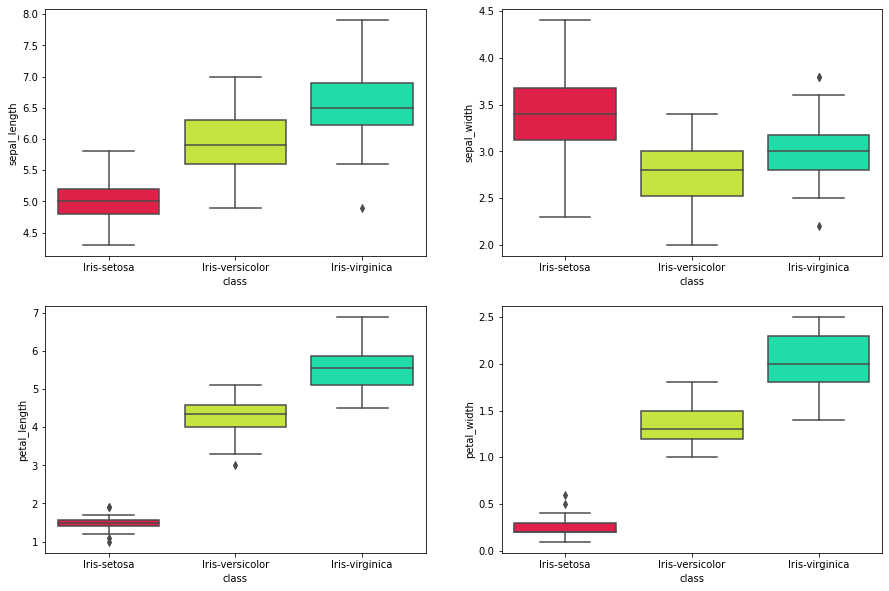

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'class', y = 'sepal_length', data = iris_df, palette="gist_ncar_r")
plt.subplot(2,2,2)
sns.boxplot(x = 'class', y = 'sepal_width', data = iris_df, palette="gist_ncar_r")
plt.subplot(2,2,3)
sns.boxplot(x = 'class', y = 'petal_length', data = iris_df, palette="gist_ncar_r")
plt.subplot(2,2,4)
sns.boxplot(x = 'class', y = 'petal_width', data = iris_df, palette="gist_ncar_r")
plt.show()

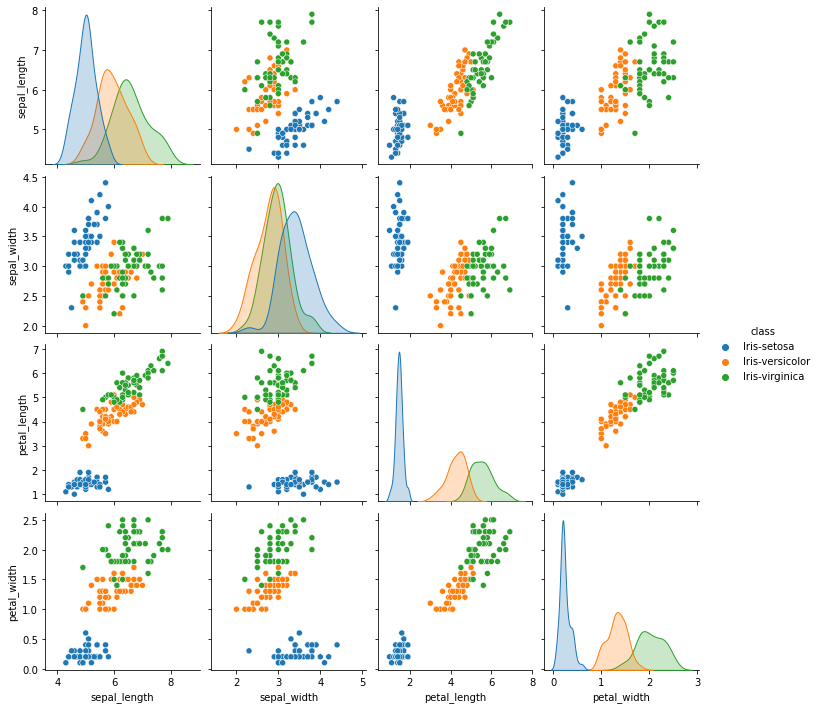

In [6]:
sns.pairplot(iris_df, hue='class')
plt.show()

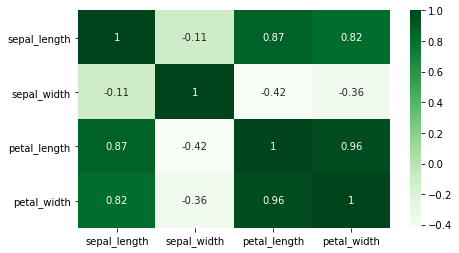

In [7]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_df.corr(),annot=True,cmap='Greens') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

<a id='section2'></a>

## 2. Build a classification model

<a id='section2.1'></a>
### 2.1 Define the model: 
we will use a decision tree based on the gini index (gini index is the default)

In [8]:
model1 = sk.tree.DecisionTreeClassifier(criterion="gini")

<a id='section2.2'></a>
### 2.2 Fit the model on the data:

Define what are the features (x) and what is the target (y)

In [9]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']

Use the model we chose on the features we chose (X and y)

In [10]:
model1.fit(X, y)

DecisionTreeClassifier()

now model1 is a tree, and it has tree features:

In [11]:
type(model1)

sklearn.tree._classes.DecisionTreeClassifier

In [12]:
model1.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

Let's see what we got:

In [13]:
text_representation = tree.export_text(model1)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



Vizualize:

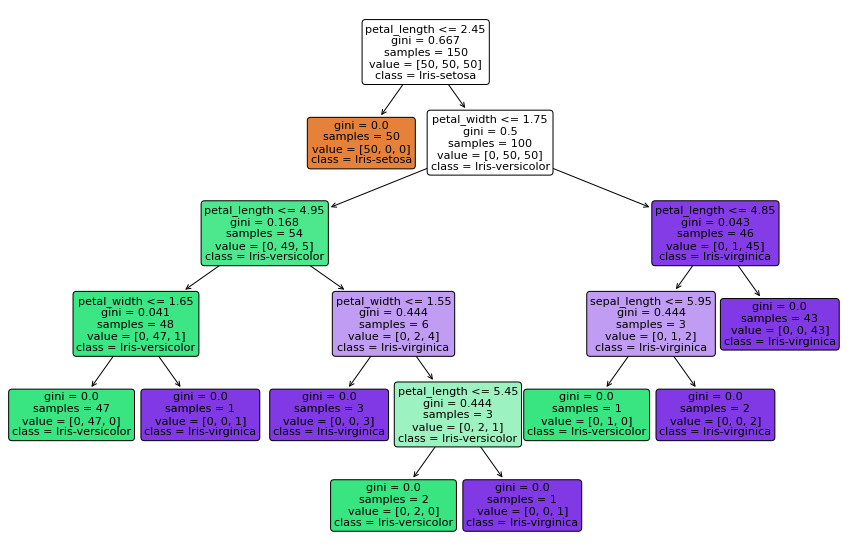

In [14]:
fig = plt.figure(figsize=(15,10))

tree.plot_tree(model1, 
               feature_names = features, 
               class_names = model1.classes_,
               filled=True, 
               rounded = True)  
plt.show()

That's nice. But how well will it predict on new data?

<a id='section2.3'></a>
### 2.3 Predict

##### Split the data to 70% train set and 30% test

In [15]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [16]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3


In [17]:
X_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1


In [18]:
y_test.head(2)

14        Iris-setosa
98    Iris-versicolor
Name: class, dtype: object

##### Use the training data to train the model (a new model - model2)

In [19]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)

DecisionTreeClassifier()

##### Finally - predict:

In [20]:
prediction2 = model2.predict(X_test)
prediction2 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

present in a nicer format:

In [21]:
df = pd.DataFrame(columns = ['class', 'predictions'])

In [22]:
df['class'] = y_test
df = df.reset_index(drop=True)

In [23]:
df['predictions'] = pd.Series(prediction2)
df.head()

,class,predictions
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica


<a id='section2.4'></a>
### 2.4 Evaluate

There are various ways to measure accuracy:

The most obvious - (number of correct)/(total)  

In [24]:
sk.metrics.accuracy_score(prediction2, y_test)

0.9555555555555556

A truth table

In [25]:
sk.metrics.confusion_matrix(y_test, prediction2)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

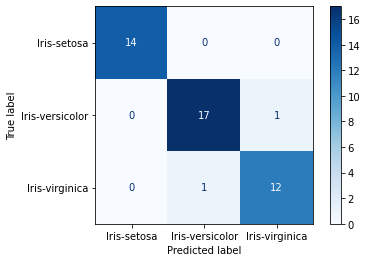

In [26]:
sk.metrics.plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)

Precision, Recall and F1 score - most common. But out of scope for this course

In [27]:
print(sk.metrics.classification_report(y_test, prediction2, target_names=model2.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



<a id='section3'></a>
## 3. Feature importance

Which attributes are the most important?

In [28]:
model1.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

organize it in a nicer format:

In [29]:
feature_importances = pd.DataFrame(model2.feature_importances_,
                                   index = iris_df.columns[:4],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_length,0.571965
petal_width,0.385096
sepal_length,0.021469
sepal_width,0.021469


<a id='section3.1'></a>
### 3.1 Petal vs. Sepal 

We see that petal is most important. What happens if we only use sepal?

In [30]:
X_s = iris_df[['sepal_length','sepal_width']]
y_s = iris_df['class']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s)) 

The accuracy of the Decision Tree is 0.6222222222222222


In [31]:
df2 = pd.DataFrame(columns = ['class', 'predictions'])
df2['class'] = y_test_s
df2 = df2.reset_index(drop=True)
df2['predictions'] = pd.Series(prediction_s) 

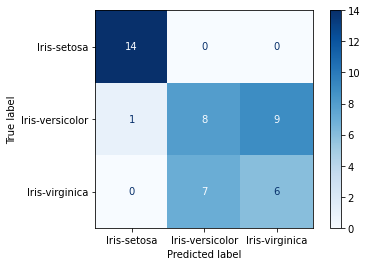

In [32]:
sk.metrics.plot_confusion_matrix(model_s, X_test_s, y_test_s, cmap=plt.cm.Blues)

In [33]:
#mixed_df = iris_df[['sepal_length','petal_width','class']]
X_m = iris_df[['sepal_length','petal_width']]
y_m = iris_df['class']
X_train_m, X_test_m, y_train_m, y_test_m = sk.model_selection.train_test_split(X_m, y_m, test_size=0.3, random_state=1) 
model_mix = sk.tree.DecisionTreeClassifier(criterion="gini")
model_mix.fit(X_train_m,y_train_m)
prediction_mix = model_mix.predict(X_test_m)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_mix, y_test_m))

The accuracy of the Decision Tree is 0.9555555555555556


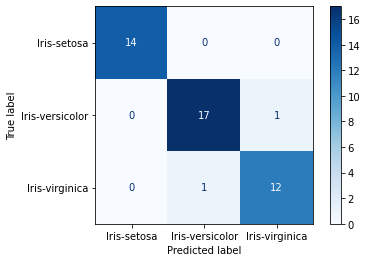

In [34]:
sk.metrics.plot_confusion_matrix(model_mix, X_test_m, y_test_m, cmap=plt.cm.Blues)

<a id='section4'></a>
## 4. Overfitting and underfitting

In [35]:
def get_acc(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

In [36]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']

In [37]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [38]:
for max_leaf_nodes in [2, 4, 6, 8, 10]:
    my_acc = get_acc(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(max_leaf_nodes, my_acc)

2 0.6
4 0.9555555555555556
6 0.9555555555555556
8 0.9555555555555556
10 0.9555555555555556


---
> Terminology:
>
>* features - attributes
>
>* class/target - the feature we want to predict
>
>* [A guide to trees - scikit-learn](https://scikit-learn.org/stable/modules/tree.html)
>
> A summary of new functions:
>
>* `plot.pie(autopct="%1.1f%%")` - a pie plot. autopct adds percentages to each of the slices of the pie chart, 1.1 - percentages with 1 number after the decimal dot.
>
>* [DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
>
>* `my_model = sk.tree.DecisionTreeClassifier(criterion="gini")` - decision tree model with the gini index as the node splitting criterion
>
>* `my_model.fit(X, y)` - train the model. X are the features and y is the target/class.
>
>* `my_model.feature_importances_` - shows how important is each of the features in model `my_model`
>
>* `sk.model_selection.train_test_split` - splits the data to train and test
>
>* `tree.export_text(my_model)` - shows the tree of the model in text format. [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html)
>
>* `tree.plot_tree` - plots a nice decision tree. [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)
>
>* [Metrics documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)
>
>* `sk.metrics.accuracy_score` - computes the model's jaccard accuracy score
>
>* `sk.metrics.confusion_matrix` - a truth table
>
>* `sk.metrics.plot_confusion_matrix` - a confusion matrix
>
> 
---

# Building models - part 2
# unit 9

1. [SVM model - linear classification](#section1)
2. [Decision trees - non linear classfication](#section2)

    2.1 [Overfitting - prune max depth](#section2.1)    
    2.2 [Overfitting - prune max depth for another dataset](#section2.2)    
    2.3 [Overfitting - use random forest](#section2.3)    

3. [Accuracy](#section3) 

4. [Feature importance](#section4)

    4.1 [Petal vs. Sepal](#section4.1) 


<a id='section1'></a>
# 1. SVM model - linear classification

Load the data

In [39]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)

Prepare the data - split the data to training data and test data:

In [40]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

Define, fit, predict, evaluate

In [41]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
sk.metrics.accuracy_score(svm_pred, y_test)

0.9777777777777777

<a id='section2'></a>
# 2. Decision trees - nonlinear classification

Reminder: the model

In [42]:
from sklearn import tree
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.9555555555555556

<a id='section2.1'></a>

## 2.1. Overfitting - prune max depth

Check the accuracy with different limits 

Organize the data - split to train and test

Define a function that builds a model according to a given tree depth, and returns it's accuracy

In [43]:
def get_acc(max_depth, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

examine differen number of leaves:

In [44]:
for max_depth in [1, 2, 3]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.6
2 0.9555555555555556
3 0.9555555555555556


<a id='section2.2'></a>

## 2.2. Overfitting - prune max depth for another dataset

Load the data

In [45]:
from sklearn.datasets import load_digits
data = load_digits()

Prepare and split:

In [46]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Use the function of max depth:

In [47]:
for max_depth in [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.1925925925925926
2 0.3148148148148148
3 0.45925925925925926
4 0.575925925925926
5 0.6888888888888889
6 0.7814814814814814
7 0.8333333333333334
8 0.8518518518518519
9 0.8574074074074074
10 0.8555555555555555
11 0.8555555555555555
12 0.8574074074074074
13 0.8611111111111112
14 0.8611111111111112
15 0.8592592592592593
20 0.8592592592592593
25 0.8592592592592593


<a id='section2.3'></a>
## 2.3 Overfitting - use random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=9, random_state=0, criterion="gini")
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)
acc = sk.metrics.accuracy_score(predrf, y_test)
acc

0.9722222222222222

<a id='section3'></a>
# 3. Accuracy

In [49]:
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [50]:
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.9555555555555556

Evaluation metric: a truth table

In [51]:
sk.metrics.confusion_matrix(y_test, pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

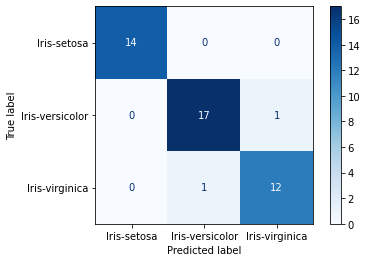

In [52]:
sk.metrics.plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)

Precision, Recall and F1 score - most common. But out of scope for this course

In [53]:

print(sk.metrics.classification_report(y_test, pred, target_names=dt.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



<a id='section4'></a>
# 4. Feature importance

Which attributes were the most important in the training data?

In [54]:
dt.feature_importances_

array([0.02146947, 0.02146947, 0.06316954, 0.89389153])

organize it in a nicer format:

In [55]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = iris_df.columns[:4],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_width,0.893892
petal_length,0.063170
sepal_length,0.021469
sepal_width,0.021469


<a id='section4.1'></a>
### 4.1 Petal vs. Sepal 

We see that petal is most important. What happens if we only use sepal?

In [56]:
X_s = iris_df[['sepal_length','sepal_width']]
y_s = iris_df['class']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s)) 

The accuracy of the Decision Tree is 0.6444444444444445


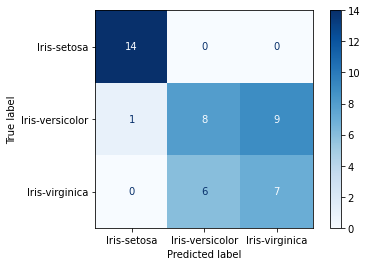

In [57]:
sk.metrics.plot_confusion_matrix(model_s, X_test_s, y_test_s, cmap=plt.cm.Blues)

In [58]:
df2 = pd.DataFrame(columns = ['class', 'predictions'])
df2['class'] = y_test_s
df2 = df2.reset_index(drop=True)
df2['predictions'] = pd.Series(prediction_s) 

Now let's try a model with two features: one sepal and one petal:

In [59]:
X_m = iris_df[['sepal_length','petal_width']]
y_m = iris_df['class']
X_train_m, X_test_m, y_train_m, y_test_m = sk.model_selection.train_test_split(X_m, y_m, test_size=0.3, random_state=1) 
model_mix = sk.tree.DecisionTreeClassifier(criterion="gini", random_state=1)
model_mix.fit(X_train_m,y_train_m)
prediction_mix = model_mix.predict(X_test_m)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_mix, y_test_m))

The accuracy of the Decision Tree is 0.9555555555555556


# Visualization principles
# unit 9
1. Log scale
2. Jitter
3. Set the scale
4. Text on plot


## Plotting binary variables

Not directly connected to today's lesson. But many of you asked.
Let look at a case were we have 2 binary variables: 'sex' and 'survived'

In [60]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Use a barplot (two variables) or a countplot (one variable)

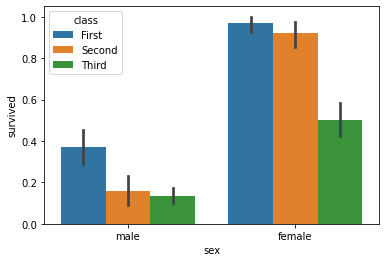

In [61]:
sns.barplot(x="sex", y="survived", hue="class",  data=titanic)
plt.show()

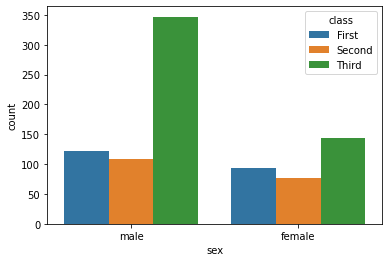

In [62]:
sns.countplot(x="sex", hue="class",  data=titanic)
plt.show()

Or use a catplot for categorical data:

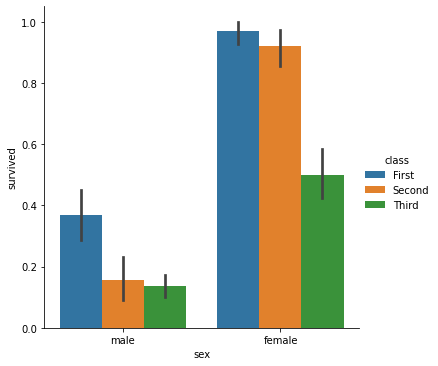

In [63]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.show()

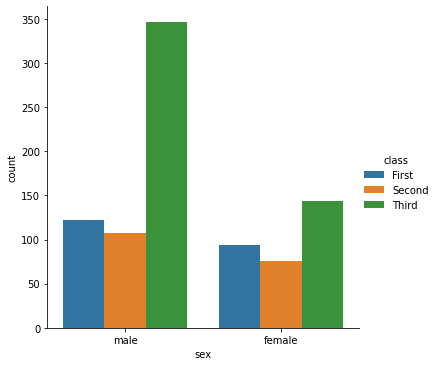

In [64]:
sns.catplot(x="sex", hue="class", kind="count", data=titanic)
plt.show()

## Log scale

In [65]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='price', ylabel='Count'>

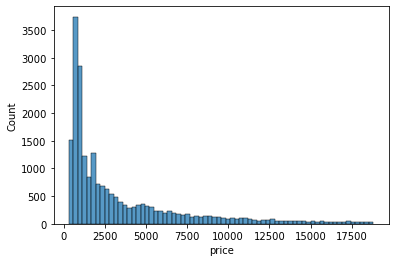

In [66]:
sns.histplot(diamonds.price[diamonds.cut == 'Ideal'])

##### One option:

<AxesSubplot:xlabel='price', ylabel='Count'>

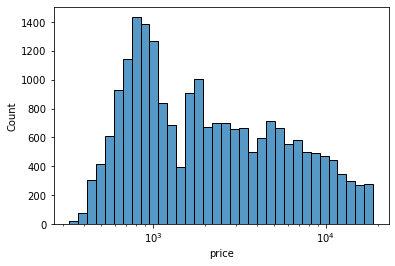

In [67]:
sns.histplot(diamonds.price[diamonds.cut == 'Ideal'], log_scale = True)

##### Another option:

<AxesSubplot:xlabel='price', ylabel='Count'>

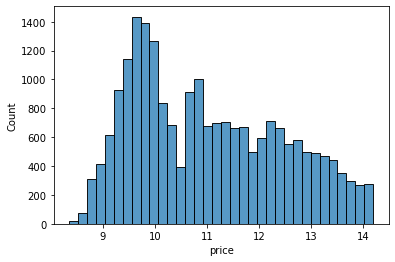

In [68]:
sns.histplot(np.log2(diamonds.price[diamonds.cut == 'Ideal']))

### Stack histogram:

<AxesSubplot:xlabel='price', ylabel='Count'>

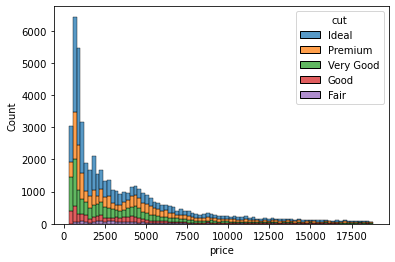

In [69]:
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",   
)

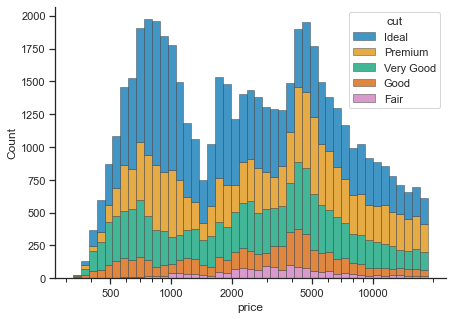

In [70]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="colorblind",
    edgecolor=".3",
    linewidth=.5, 
    log_scale = True
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])
plt.show()

## Jitter in python

Google it: [Jitter in python](https://www.google.com/search?q=jitter+in+python&sxsrf=ALeKk01NFy18kBeX8CmyToZAT-l4YIlJeQ%3A1621252840686&ei=6FqiYPSmKYzdkwXckaGgCw&oq=jitter&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIFCAAQkQIyBQgAEMsBMgUIABDLATICCAAyAggAMgUIABDLATICCAAyAggAMgIIADoECAAQQzoFCAAQsQM6CAgAELEDEJECOggILhCxAxCDAToFCC4QsQM6BwgAEIcCEBQ6AgguUJ8gWIcuYJg1aAFwAngAgAGdAYgB1giSAQMwLjiYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=gws-wiz)

Documentation contains such a good example we'll just [follow it](https://seaborn.pydata.org/generated/seaborn.stripplot.html)

In [71]:
tips = sns.load_dataset("tips")

In [72]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

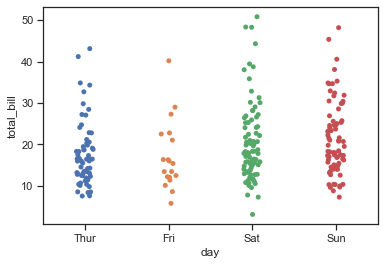

In [73]:
sns.stripplot(x="day", y="total_bill", data=tips)

Use a smaller amount of jitter:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

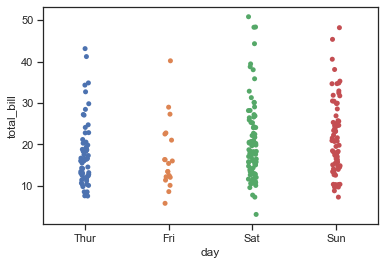

In [74]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

Jitter plus a boxplot:

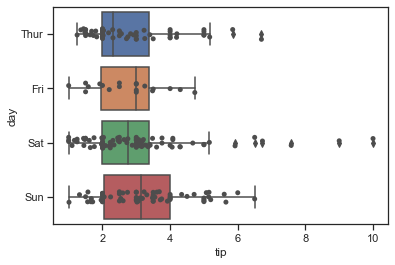

In [75]:
ax = sns.boxplot(x="tip", y="day", data=tips)
ax = sns.stripplot(x="tip", y="day", data=tips, color=".3")

## Set the scale

Google it: [set scale seaborn](https://www.google.com/search?q=set+scale+seaborn&sxsrf=ALeKk02NiH79RWrRRXIqusuG-vHfuyIm2A%3A1621254123926&ei=61-iYOiGOMyxkwWAiZjICQ&oq=set+scale+sea&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIGCAAQFhAeMgYIABAWEB4yBggAEBYQHjoHCCMQsAMQJzoHCAAQRxCwAzoCCAA6BQghEKABOggIABAIEA0QHlC8EVjyJmCULGgEcAJ4AIABogGIAbgHkgEDMC43mAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz)

##### One option:

[(0.0, 100.0)]

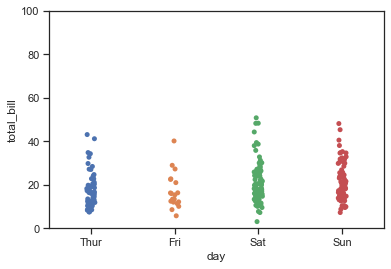

In [76]:
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)
ax.set(ylim=(0, 100))

##### Another option:

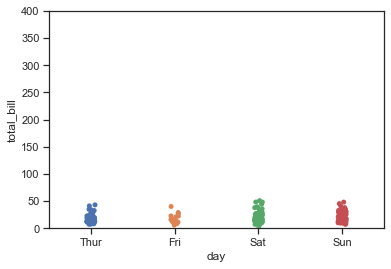

In [77]:
plt.ylim(0, 400)
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

## Add labels onto the plot

Google it: [add text to plot seaborn](https://www.google.com/search?q=add+text+to+plot+seaborn&sxsrf=ALeKk01vym2w-SfYoAOBXBgUbDCr0I04Uw%3A1621255993821&ei=OWeiYObWMdCTkwXRoIngCw&oq=add+text+to+plot+seaborn&gs_lcp=Cgdnd3Mtd2l6EAMyAggAMgYIABAWEB4yBggAEBYQHjoHCCMQsAMQJzoHCAAQRxCwAzoECAAQQzoGCAAQBxAeUJAcWKgzYJs1aAFwAngAgAGeAYgBmgqSAQQwLjEwmAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz&ved=0ahUKEwim1-ec4dDwAhXQyaQKHVFQArwQ4dUDCA4&uact=5_)

In [78]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


With a legend:

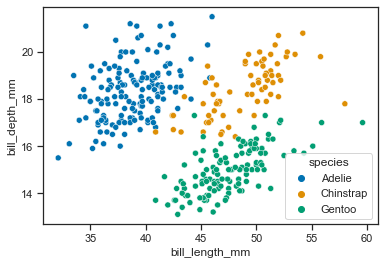

In [79]:
ax = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue = 'species', palette = 'colorblind')

Without a legend but with text: